<h1>Training and Visualizing a Decision Tree</h1>

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()
X = iris.data[:,2:] 
y = iris.target

In [7]:
pip install pydotplus

  Stored in directory: C:\Users\ASUS\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [27]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR,"images",CHAPTER_ID,fig_id)

In [29]:
import io
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz

dot_data = io.StringIO()
filename = "iris.png"

f = open(r'C:\Users\ASUS\Anaconda3\Library\bin\graphviz\iris_tree.dot','w')
out = export_graphviz(
    tree_clf,
    out_file = f,
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
    )

'''
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
'''



"\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())\ngraph.write_png(filename)\nimg = mpimg.imread(filename)\nplt.figure(figsize=(100, 200))\nplt.imshow(img,interpolation='nearest')\n"

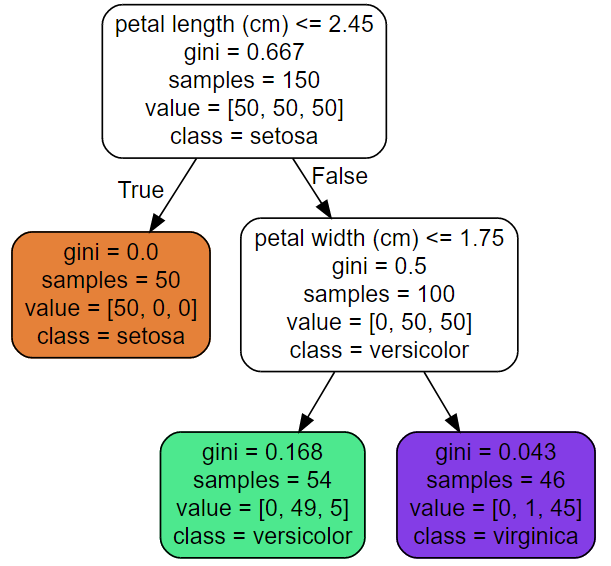

To do nonleaf node splits, scikit-learn uses the CART algorithm, which only produces binary trees (True/False)

<h2>Estimating class probability</h2>

In [30]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [31]:
tree_clf.predict([[5,1.5]])

array([1])

<h2>CART Algorithm</h2>

Classification And Regression Tree algorithm is used to train Decision Trees.

- split the training set in 2 subsets using a single feature k and a threshold (tk)

- to find tk, it searches for the (k,tk) pair which produces the purest subsets

CART cost function

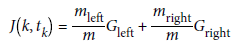

This process is repeated until maximum depth is hit or if it cannot find a split that will reduce it's impurity.

Greedy Algorithm: an algorithm which searches for the optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity level several levels down.

<h3>Computational Complexity</h3>

Making predictions requires travelling from root to leaf. So traversing through a decision tree requires going through roughly O(log2(m)) nodes. Since each node only contains one feature to be checked, the prediction complexity is also O(log2(m)), Hence predictions are very fast.

Although prediction complexity is less, the training complexity is high, as each feature needs to be checked with each instance. Hence your complexity increases to O(nxmlog(m))

<h3> Gini impurity or Entropy?</h3>

Entropy is given by 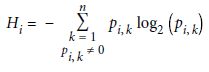

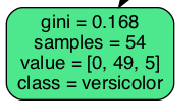

Entropy of above leaf is equal to: -((0/54) * log2(0/54) + (49/54) * log2(49/54) + (5/54) * log2(5/54)).

Usually both Entropy and Gini give the same results. However when they do differ, Gini impurity tends to isolate the most frequent class while entropy gives more balanced trees.

Information Gain = Parent entropy - weighted average of child entropy leaves

**Non Parametric Model**: The number of parameters is not determined prior to training, hence the model structure sticks closely to the data. 

**Parametric Model**: This model has a predetermined number of parameters, so it's degree of freedom is limited hence the risk of overfitting is reduced. 

To avoid overfitting the training data, its required to restrict the Decision Tree's freedom during training. Usually reducing the max_depth will regularize the model and reduce the risk of overfitting. 

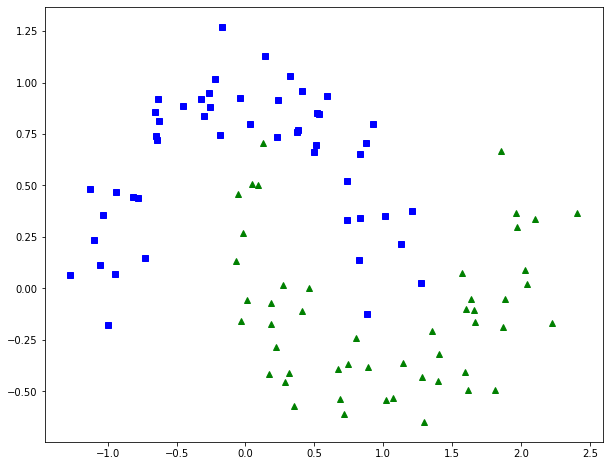

In [37]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

fig,ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(X[:,0][y == 0],X[:,1][y==0],'bs')
ax.plot(X[:,0][y == 1],X[:,1][y==1],'g^')


In [43]:
import numpy as np
#Non parametric model
dtree = DecisionTreeClassifier()
dtree.fit(X,y)

#making meshgrid
x0min,x0max,x1min,x1max = min(X[:,0]),max(X[:,0]),min(X[:,1]),max(X[:,1])
x0range = np.linspace(x0min,x0max,100)
x1range = np.linspace(x1min,x1max,100)
x0mesh,x1mesh = np.meshgrid(x0range,x1range)
X_pred = np.c_[x0mesh.ravel(),x1mesh.ravel()]
y_pred = dtree.predict(X_pred).reshape(x0mesh.shape)


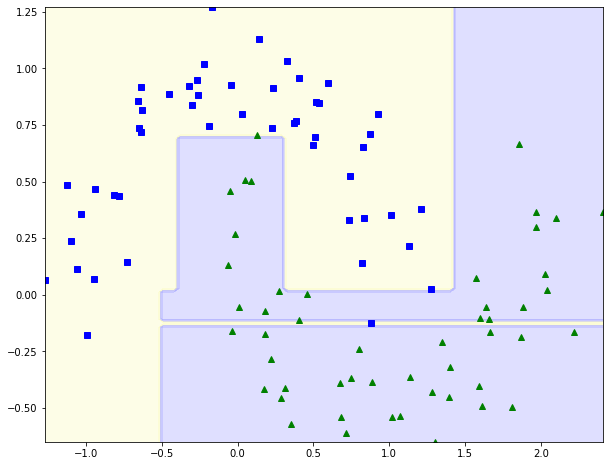

In [44]:
from matplotlib.colors import ListedColormap

fig,ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(X[:,0][y == 0],X[:,1][y==0],'bs')
ax.plot(X[:,0][y == 1],X[:,1][y==1],'g^')
col_scheme = ListedColormap(['#fafab0','#9898ff']) 
ax.contourf(x0mesh,x1mesh,y_pred,alpha = 0.3,cmap = col_scheme)

As seen above, the non parametric model is overfitting as there is no hyperparameters to restrict it from overfitting/regularize it

In [45]:
#parametric model
dtree_param = DecisionTreeClassifier(min_samples_leaf = 4)
dtree_param.fit(X,y)
y_pred_param = dtree_param.predict(X_pred).reshape(x0mesh.shape)

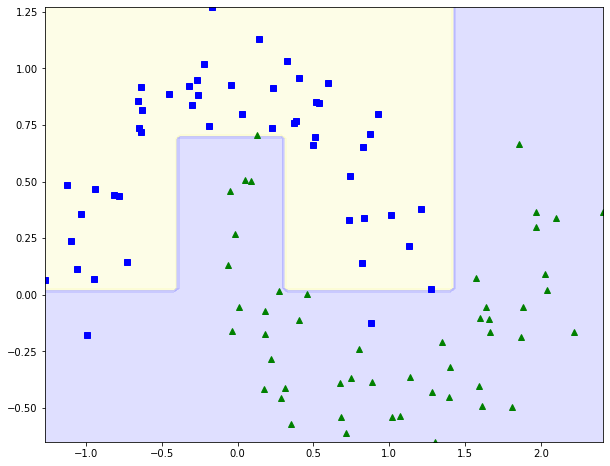

In [46]:
from matplotlib.colors import ListedColormap

fig,ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(X[:,0][y == 0],X[:,1][y==0],'bs')
ax.plot(X[:,0][y == 1],X[:,1][y==1],'g^')
col_scheme = ListedColormap(['#fafab0','#9898ff']) 
ax.contourf(x0mesh,x1mesh,y_pred_param,alpha = 0.3,cmap = col_scheme)

<h3>Regression</h3>

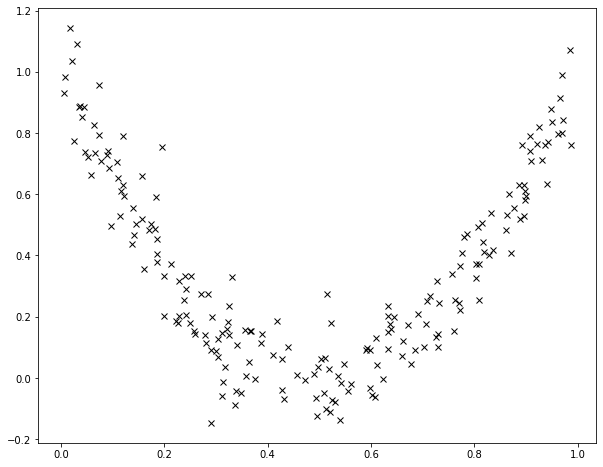

In [53]:
np.random.seed(42)
X = np.random.rand(200,1)
y = 4*(X-0.5)**2  
y = y + (np.random.randn(200,1)/10)
fig,ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(X,y,'kx')

In [55]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [56]:
tree_reg.predict([[0.6]])

array([0.11063973])

This predicts a value which is the average of that particular leaf that is obtained during training

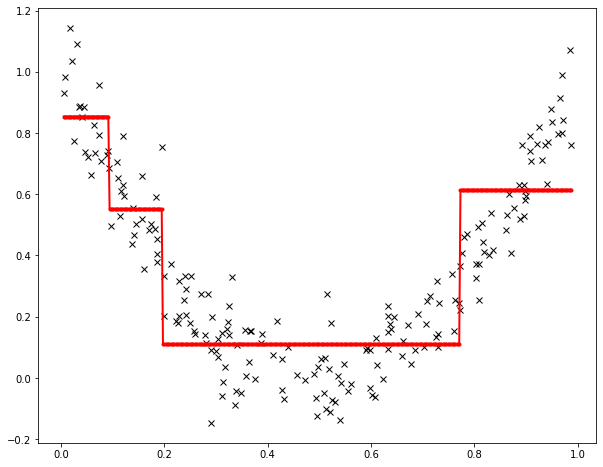

In [57]:
np.random.seed(42)
X = np.random.rand(200,1)
y = 4*(X-0.5)**2  
y = y + (np.random.randn(200,1)/10)
fig,ax = plt.subplots(1,1,figsize = (10,8))

xvalues = np.linspace(min(X),max(X),400)
y_pred_reg = tree_reg.predict(xvalues)

ax.plot(X,y,'kx', label = 'Y values')
ax.plot(xvalues,y_pred_reg,'r.-',linewidth = 2,label = 'Y Predicted')

In [58]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth = 3)
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

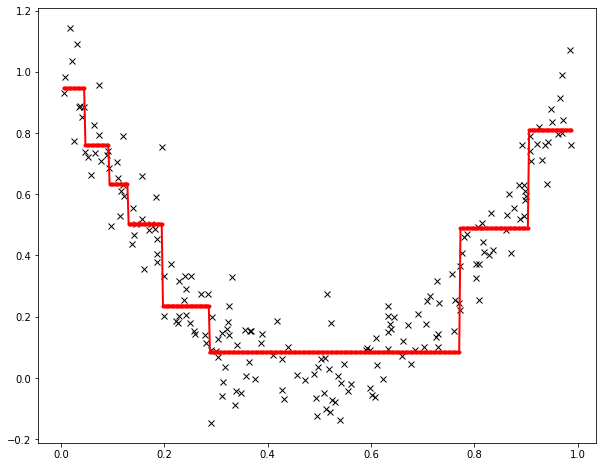

In [60]:
fig,ax = plt.subplots(1,1,figsize = (10,8))

xvalues = np.linspace(min(X),max(X),400)
y_pred_reg = tree_reg.predict(xvalues)

ax.plot(X,y,'kx', label = 'Y values')
ax.plot(xvalues,y_pred_reg,'r.-',linewidth = 2,label = 'Y Predicted')

In the DecisionTree regressor, the cost function tries to reduce the Mean Square Error at each leaf.
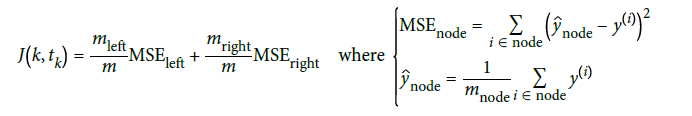
